# from pyspark import SparkConf, SparkContext

# 1. 스파크 환경 설정 객체 생성
# 실행 모드: local → 내 PC(로컬)에서 실행
conf = SparkConf().setMaster("local").setAppName("rdd_basic")   

# 2. 스파크 컨텍스트 생성
# 위에서 만든 설정(conf)을 기반으로 SparkContext 실행
sc = SparkContext(conf=conf)

In [2]:
filepath = "/home/hadoop/python_code/spark/restaurant_reviews.csv"

In [3]:
lines = sc.textFile(f"file:///{filepath}")
lines

file:////home/hadoop/python_code/spark/restaurant_reviews.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [4]:
lines.collect()

['id,item,cateogry,reviews,',
 '0,짜장면,중식,125,',
 '1,짬뽕,중식,235,',
 '2,김밥,분식,32,',
 '3,떡볶이,분식,534,',
 '4,라멘,일식,223,',
 '5,돈가스,일식,52,',
 '6,우동,일식,12,',
 '7,쌀국수,아시안,312,',
 '8,햄버거,패스트푸드,12,',
 '9,치킨,패스트푸드,23']

In [5]:
header = lines.first()
header

'id,item,cateogry,reviews,'

In [6]:
datas = lines.filter(lambda row : row != header)
datas

PythonRDD[3] at RDD at PythonRDD.scala:53

In [7]:
datas.collect()

['0,짜장면,중식,125,',
 '1,짬뽕,중식,235,',
 '2,김밥,분식,32,',
 '3,떡볶이,분식,534,',
 '4,라멘,일식,223,',
 '5,돈가스,일식,52,',
 '6,우동,일식,12,',
 '7,쌀국수,아시안,312,',
 '8,햄버거,패스트푸드,12,',
 '9,치킨,패스트푸드,23']

In [12]:
# parse_task('6,우동,일식,12,')

In [10]:
def parse_task(row):
    field = row.split(",")
    # print("field = ", field)
    key = field[2]
    value = int(field[3])
    return key, value

In [14]:
category_review_rdd = datas.map(parse_task)
category_review_rdd

PythonRDD[5] at RDD at PythonRDD.scala:53

In [15]:
category_review_rdd.collect()

[('중식', 125),
 ('중식', 235),
 ('분식', 32),
 ('분식', 534),
 ('일식', 223),
 ('일식', 52),
 ('일식', 12),
 ('아시안', 312),
 ('패스트푸드', 12),
 ('패스트푸드', 23)]

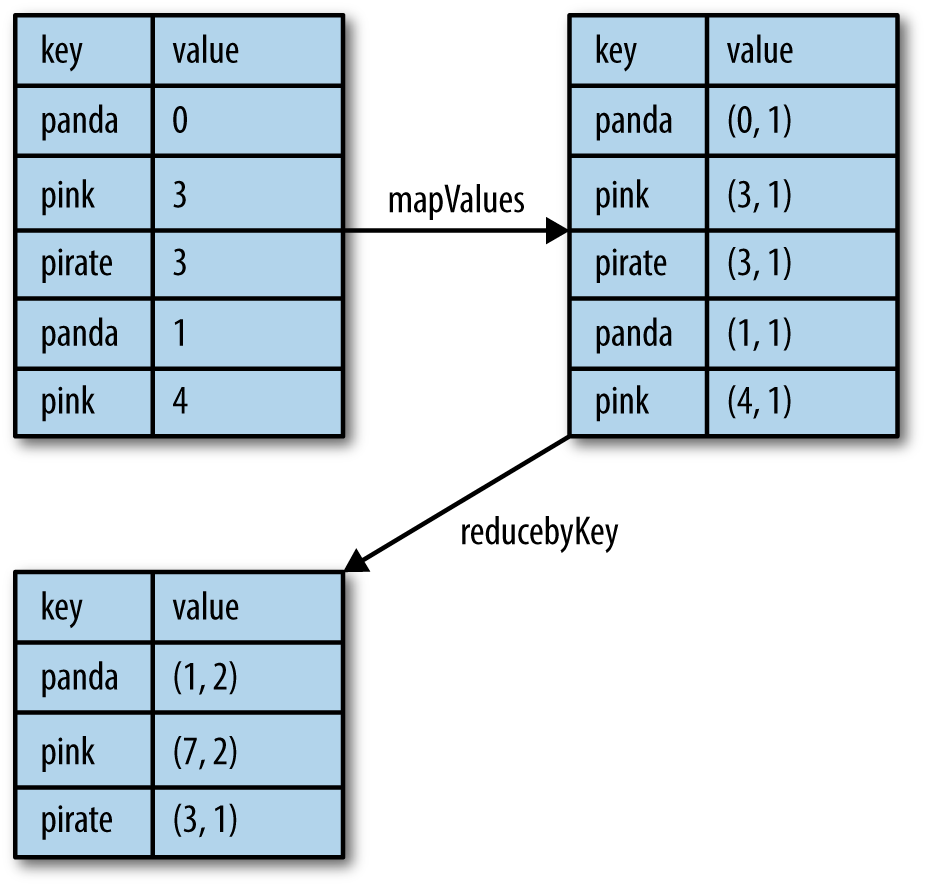

In [19]:
category_review_count_rdd = category_review_rdd.mapValues(lambda x : (x,1))
category_review_count_rdd.collect()   

('중식', (125, 1))
(a[0] +  b[0], a[1] +  b[1])
a[0] = '중식'
b[0] = (125, 1)
a[1] = (125, 1)
b[1] = 1
(a[0] +  b[0], a[1] +  b[1]) =  ('중식' + (125, 1), (125, 1) + 1)

('중식', (235, 1))
a[0] = '중식'
b[0] = (235, 1)
a[1] = (235, 1)
b[1] = 1

(a[0] +  b[0], a[1] +  b[1]) =  ('중식' + (235, 1), (235, 1) + 1)

('중식', (360, 2)),

[('중식', (125, 1)),
 ('중식', (235, 1)),
 ('분식', (32, 1)),
 ('분식', (534, 1)),
 ('일식', (223, 1)),
 ('일식', (52, 1)),
 ('일식', (12, 1)),
 ('아시안', (312, 1)),
 ('패스트푸드', (12, 1)),
 ('패스트푸드', (23, 1))]

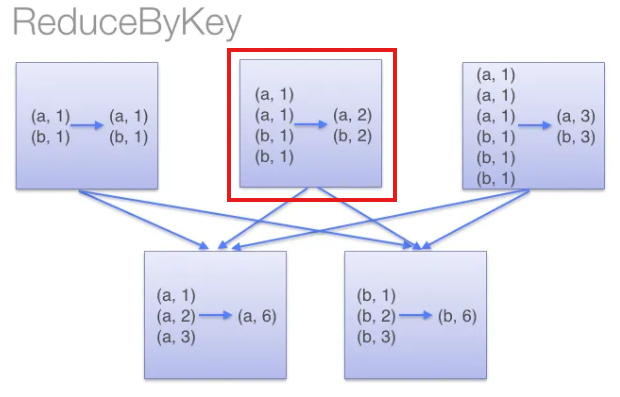

In [21]:
reduced = category_review_count_rdd.reduceByKey(lambda a, b : (a[0] +  b[0], a[1] +  b[1]) )
reduced

PythonRDD[12] at RDD at PythonRDD.scala:53

In [22]:
reduced.collect()

[('중식', (360, 2)),
 ('분식', (566, 2)),
 ('일식', (287, 3)),
 ('아시안', (312, 1)),
 ('패스트푸드', (35, 2))]

In [23]:
average = reduced.mapValues(lambda x : x[0] / x[1])
average.collect()

[('중식', 180.0),
 ('분식', 283.0),
 ('일식', 95.66666666666667),
 ('아시안', 312.0),
 ('패스트푸드', 17.5)]

In [24]:
sc.stop()